# Ciclo diurno e stagionale - Stazione B

In [ ]:
install.packages('dplyr')
library('dplyr')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data_w = read.table('ProcessedData/B/Winter_B_proc.txt', col.names = c('AbsTime', 'Year', 'Month', 'Day', 'Hour', 'Minutes', 'wndSpeed', 'wndDir'))
data_s = read.table('ProcessedData/B/Spring_B_proc.txt', col.names = c('AbsTime', 'Year', 'Month', 'Day', 'Hour', 'Minutes', 'wndSpeed', 'wndDir'))

In [ ]:
dim(data_w)
dim(data_s)

[1] 4671    8

[1] 5698    8

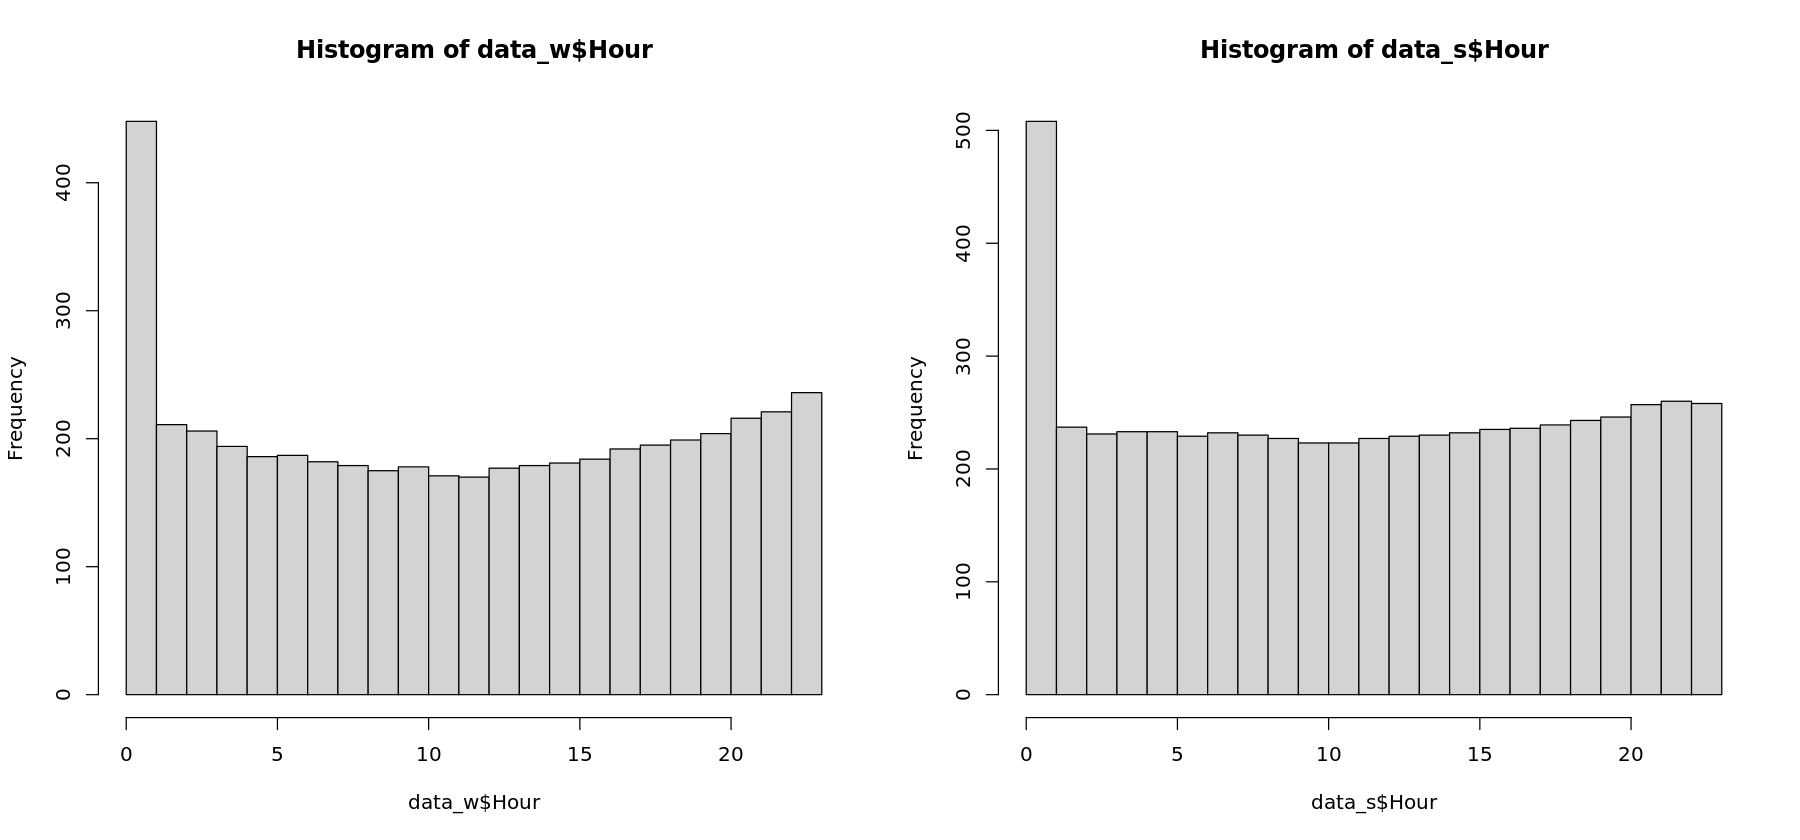

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow = c(1,2))
hist(data_w$Hour, breaks = 24)
hist(data_s$Hour, breaks = 24)

In [ ]:
# media oraria
hourly_mean_w = data_w %>% dplyr::group_by(Hour) %>% dplyr::summarise(spdMean = mean(wndSpeed), dirMean = mean(wndDir)*pi/180, spdStd = sd(wndSpeed))
hourly_mean_s = data_s %>% dplyr::group_by(Hour) %>% dplyr::summarise(spdMean = mean(wndSpeed), dirMean = mean(wndDir)*pi/180, spdStd = sd(wndSpeed))


# media giornaliera
daily_mean_w = data_w %>% dplyr::group_by(Month, Day) %>% dplyr::summarise(spdMean = mean(wndSpeed), dirMean = mean(wndDir)*pi/180, spdStd = sd(wndSpeed))
daily_mean_s = data_s %>% dplyr::group_by(Month, Day) %>% dplyr::summarise(spdMean = mean(wndSpeed), dirMean = mean(wndDir)*pi/180, spdStd = sd(wndSpeed))


`summarise()` has grouped output by 'Month'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Month'. You can override using the `.groups` argument.



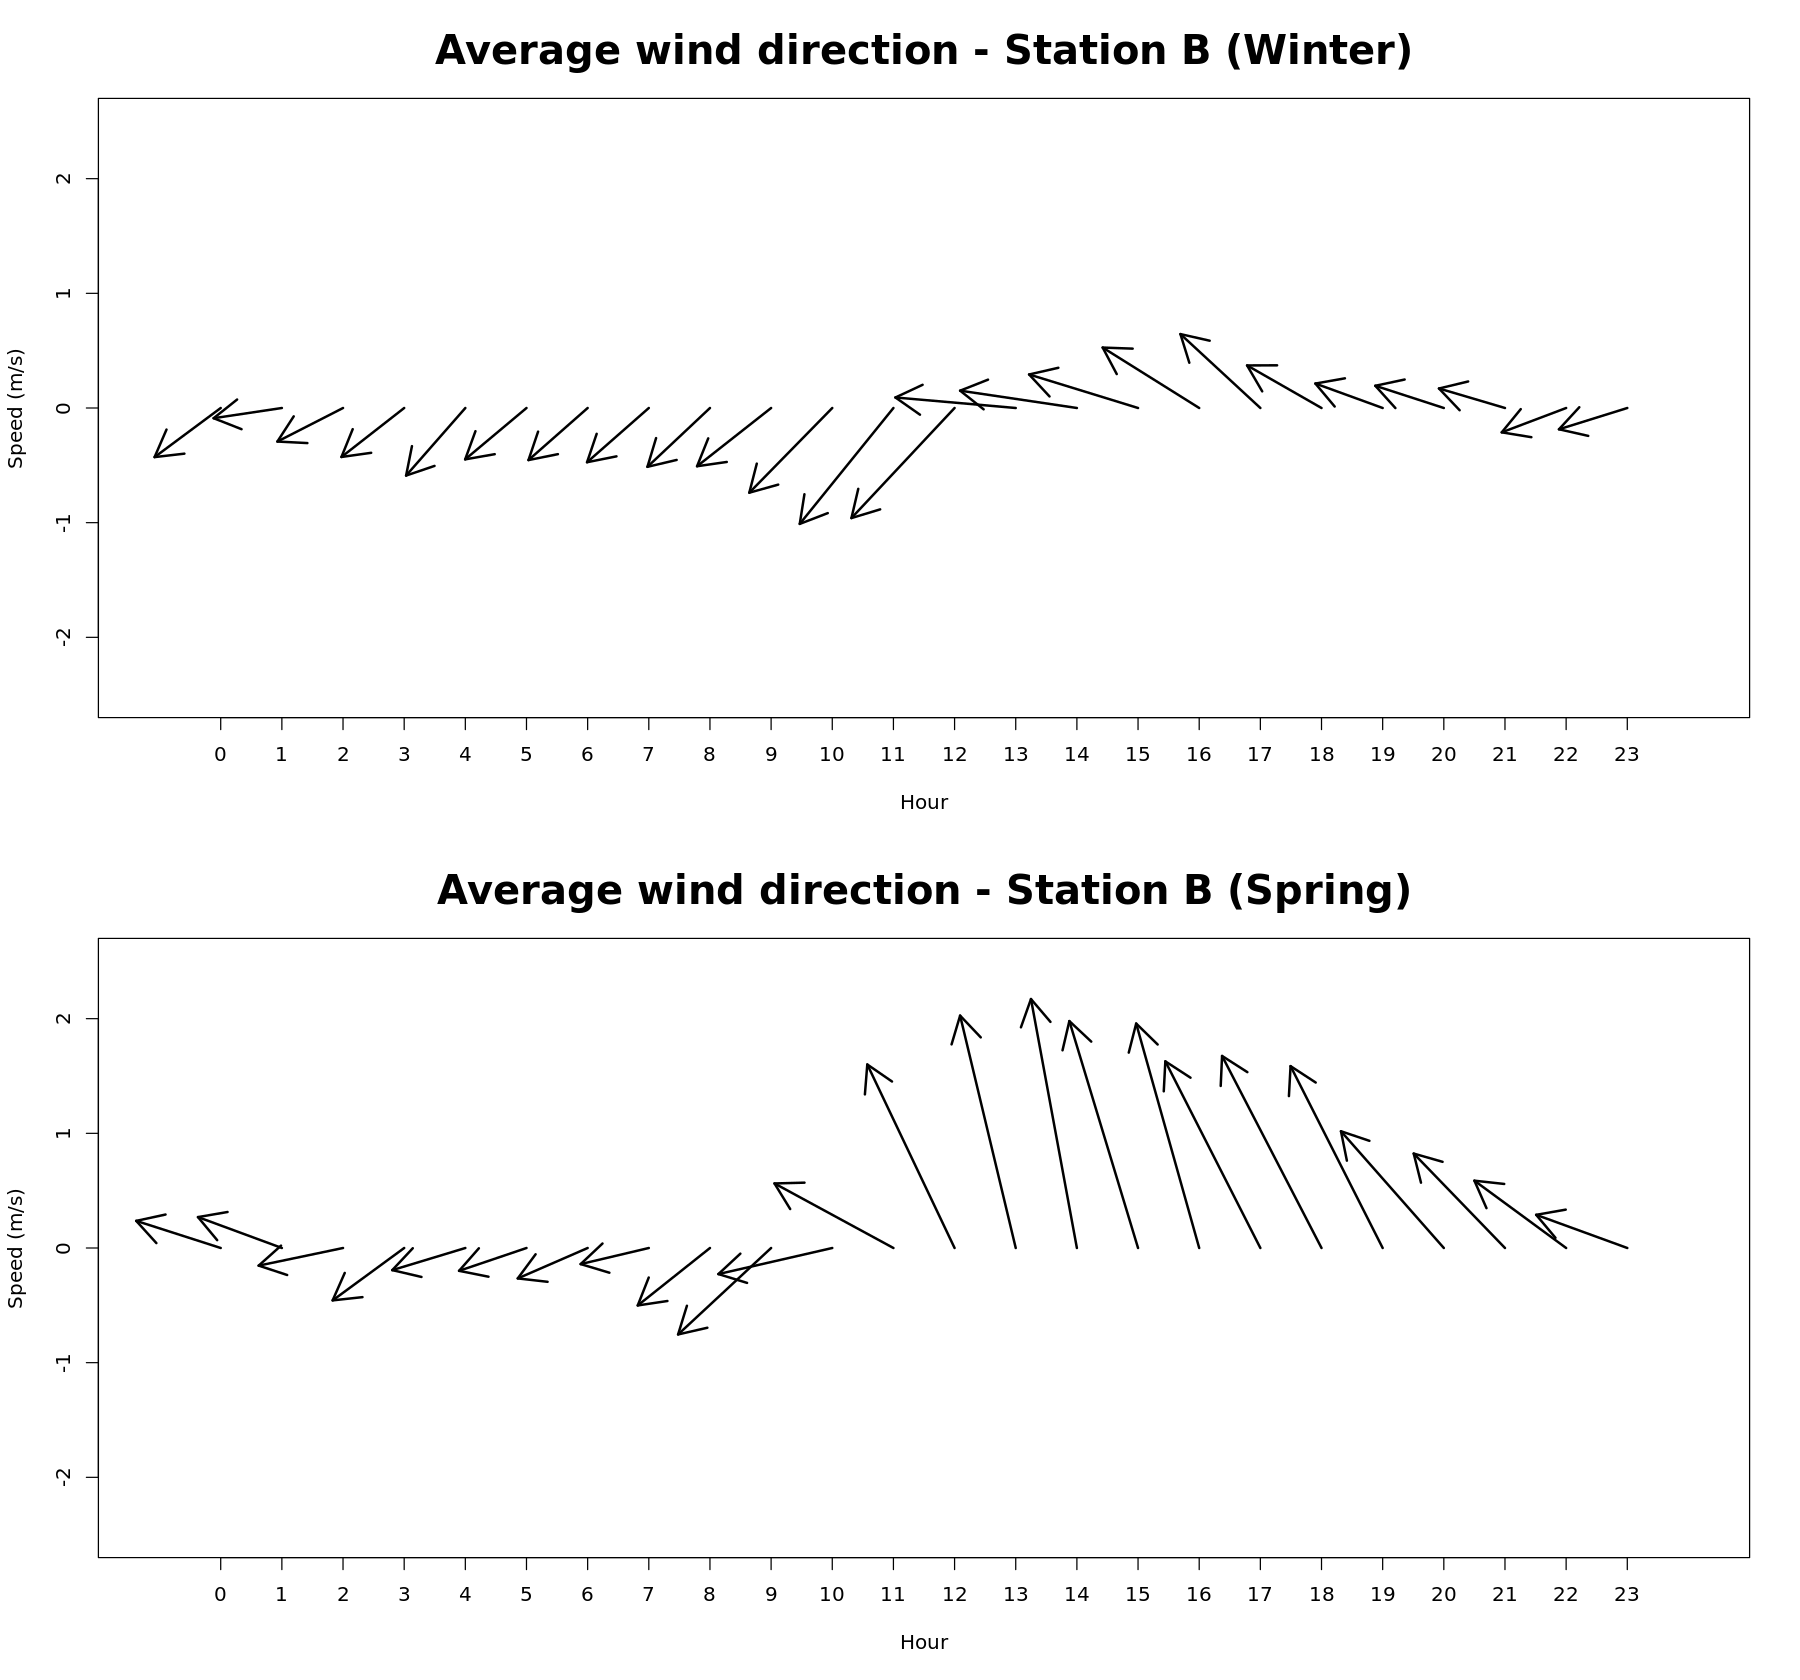

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 14)
par(mfrow = c(2,1))

plot(0:23, rep(0,24), type = 'n', ylim = c(-2.5,2.5), main = 'Average wind direction - Station B (Winter)', cex.main = 2,
    ylab = 'Speed (m/s)', xlab = 'Hour', xlim = c(-1,24), xaxt = 'n')
axis(1, at = 0:23)
arrows(0:23, rep(0,24), 0:23 + hourly_mean_w$spdMean*cos(hourly_mean_w$dirMean), 
        hourly_mean_w$spdMean*sin(hourly_mean_w$dirMean), lwd=2)

plot(0:23, rep(0,24), type = 'n', ylim = c(-2.5,2.5), main = 'Average wind direction - Station B (Spring)', cex.main = 2,
    ylab = 'Speed (m/s)', xlab = 'Hour', xlim = c(-1,24), xaxt = 'n')
axis(1, at = 0:23)
arrows(0:23, rep(0,24), 0:23 + hourly_mean_s$spdMean*cos(hourly_mean_s$dirMean), 
        hourly_mean_s$spdMean*sin(hourly_mean_s$dirMean), lwd = 2)



In [ ]:
a = data_w %>% dplyr::group_by(Hour, Month, Day) %>% dplyr::summarise(spdMean = mean(wndSpeed), dirMean = mean(wndDir), spdStd = sd(wndSpeed))


`summarise()` has grouped output by 'Hour', 'Month'. You can override using the `.groups` argument.



## Media su mesi diversi

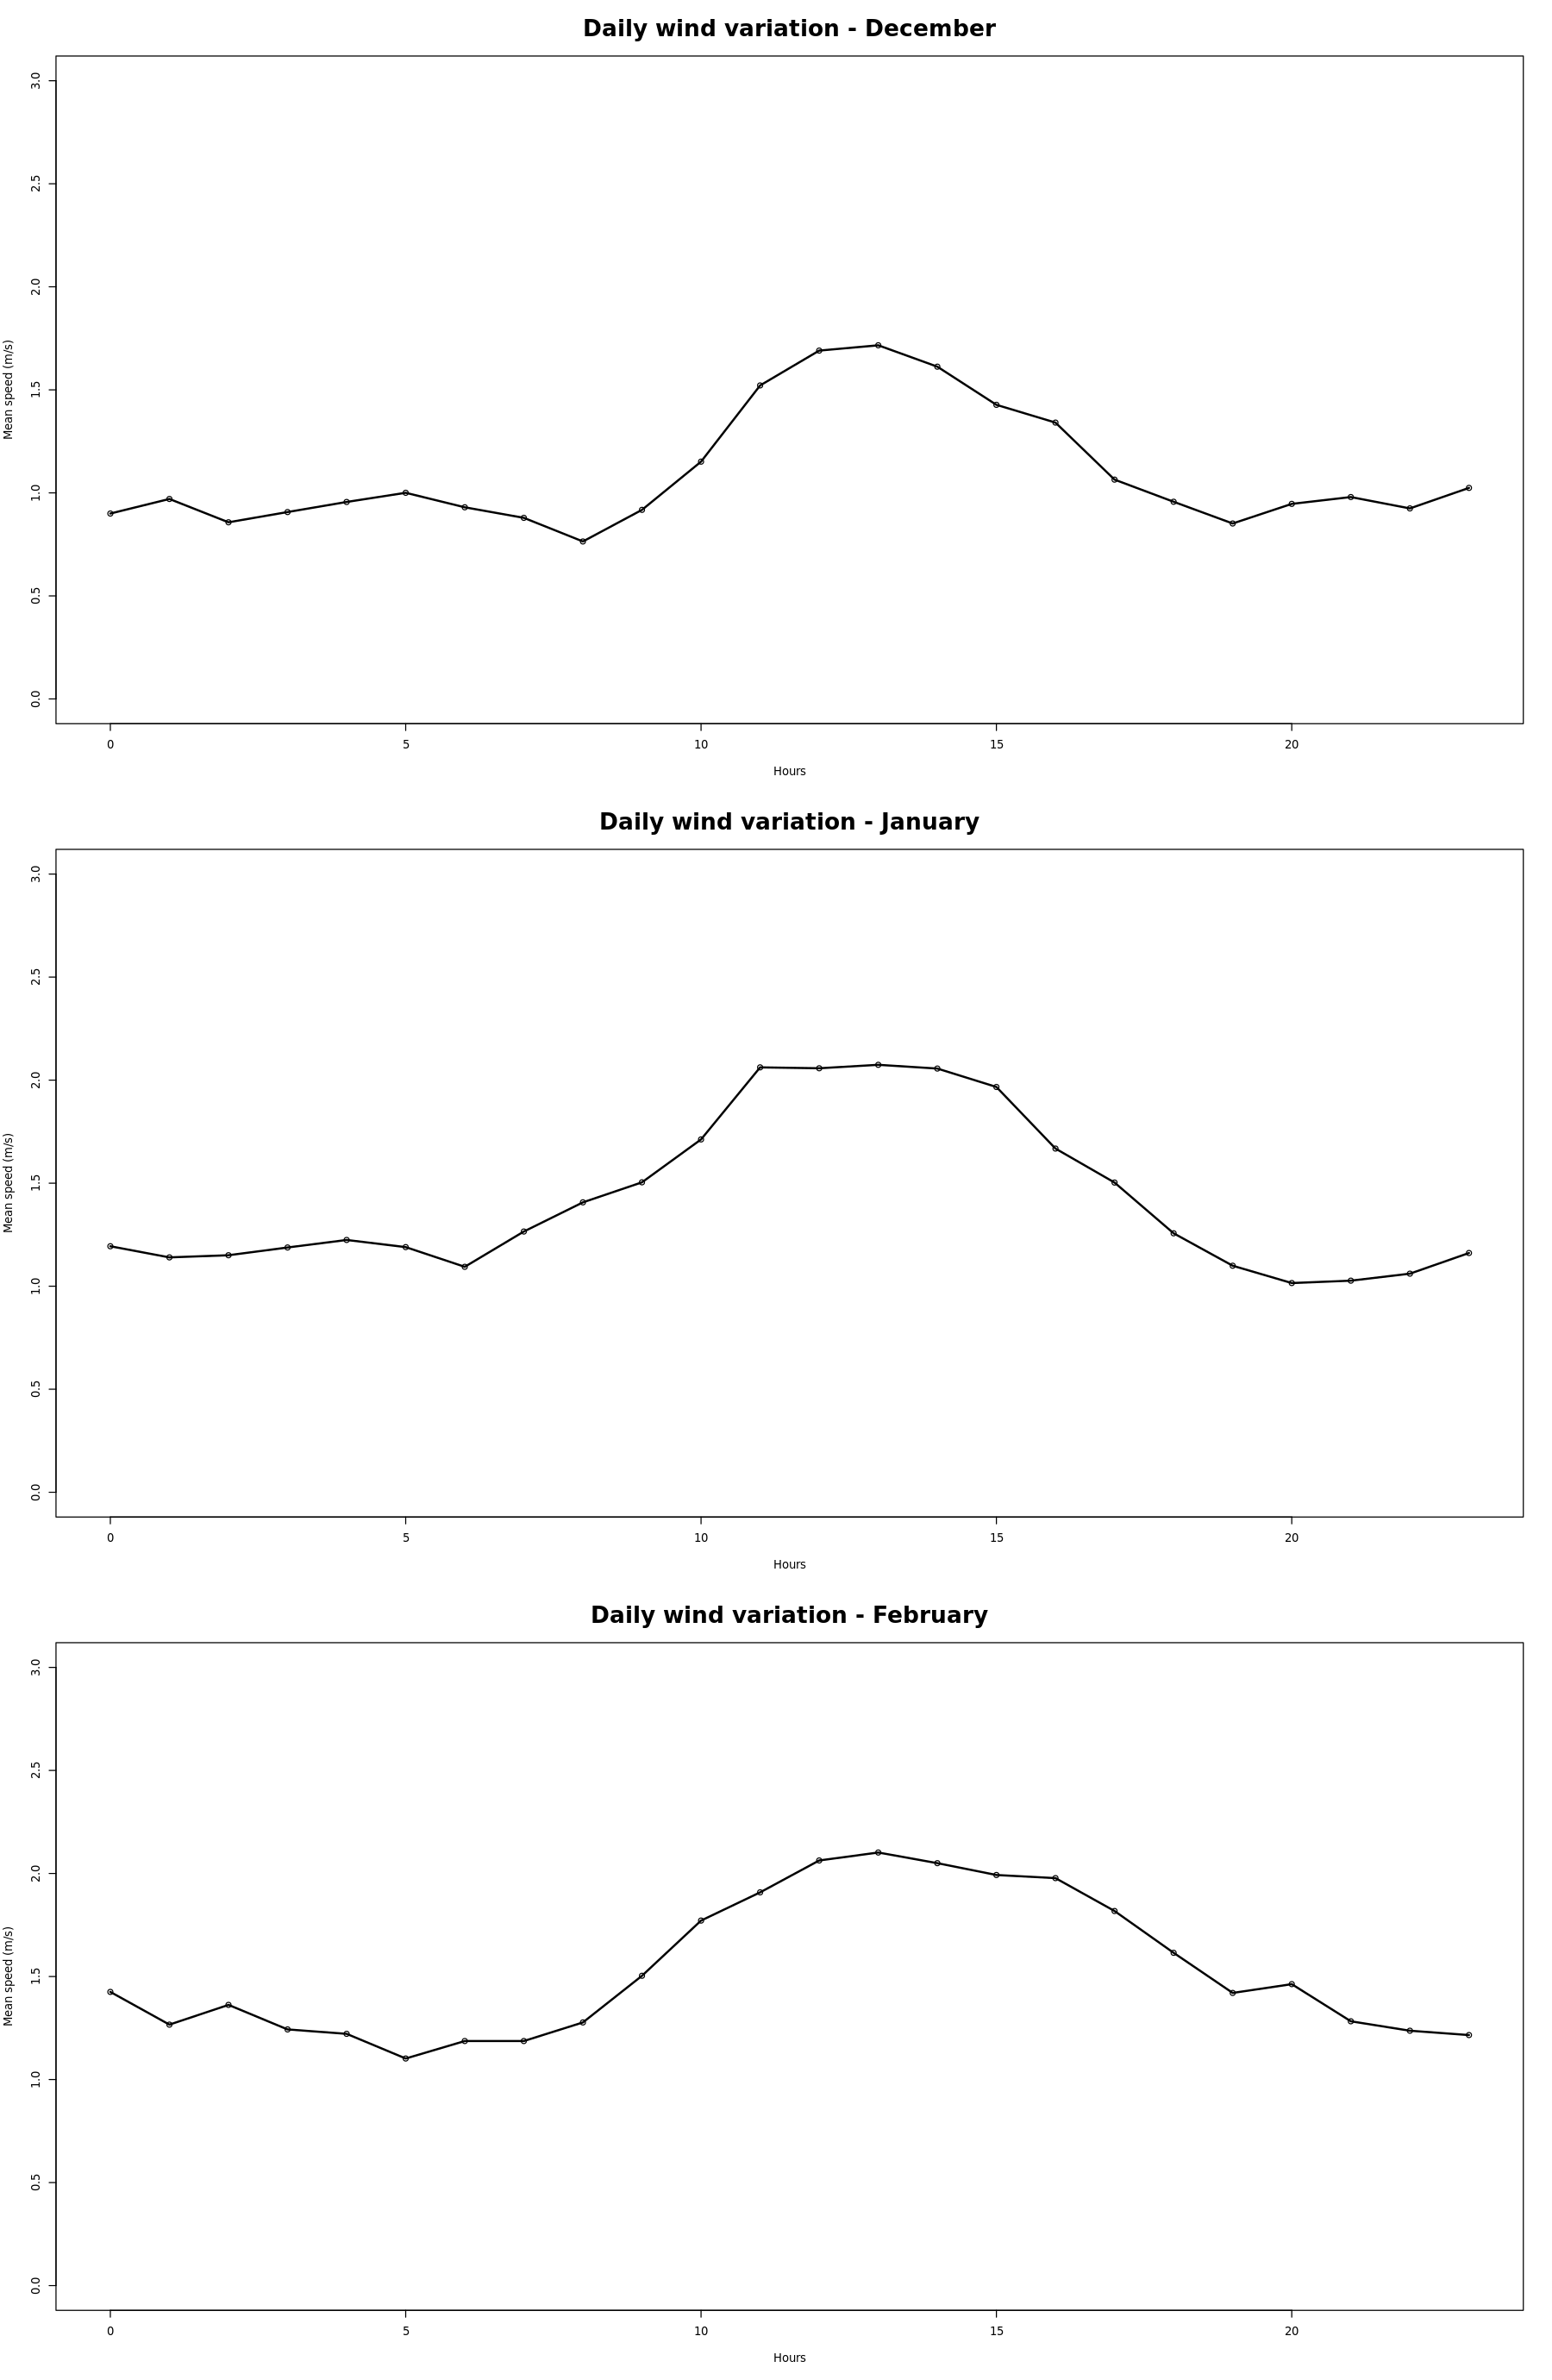

In [ ]:
dec = data_w %>% filter(Month == 12) %>% dplyr::group_by(Hour) %>% dplyr::summarise(spdMean = mean(wndSpeed), dirMean = mean(wndDir)*pi/180, spdStd = sd(wndSpeed))
jan = data_w %>% filter(Month == 1) %>% dplyr::group_by(Hour) %>% dplyr::summarise(spdMean = mean(wndSpeed), dirMean = mean(wndDir)*pi/180, spdStd = sd(wndSpeed))
feb = data_w %>% filter(Month == 2) %>% dplyr::group_by(Hour) %>% dplyr::summarise(spdMean = mean(wndSpeed), dirMean = mean(wndDir)*pi/180, spdStd = sd(wndSpeed))

options(repr.plot.width = 15, repr.plot.height = 23)
par(mfrow = c(3,1))
plot(0:23, dec$spdMean, xlab = 'Hours', ylab = 'Mean speed (m/s)', main = 'Daily wind variation - December', ylim = c(0,3), cex.main = 2)
lines(0:23, dec$spdMean, xlab = 'Hours', ylab = 'Mean speed (m/s)', lwd=2, )


plot(0:23, jan$spdMean, xlab = 'Hours', ylab = 'Mean speed (m/s)', main = 'Daily wind variation - January', ylim = c(0,3), cex.main = 2)
lines(0:23, jan$spdMean, xlab = 'Hours', ylab = 'Mean speed (m/s)', lwd=2, )


plot(0:23, feb$spdMean, xlab = 'Hours', ylab = 'Mean speed (m/s)', main = 'Daily wind variation - February', ylim = c(0,3), cex.main = 2)
lines(0:23, feb$spdMean, xlab = 'Hours', ylab = 'Mean speed (m/s)', lwd=2, )



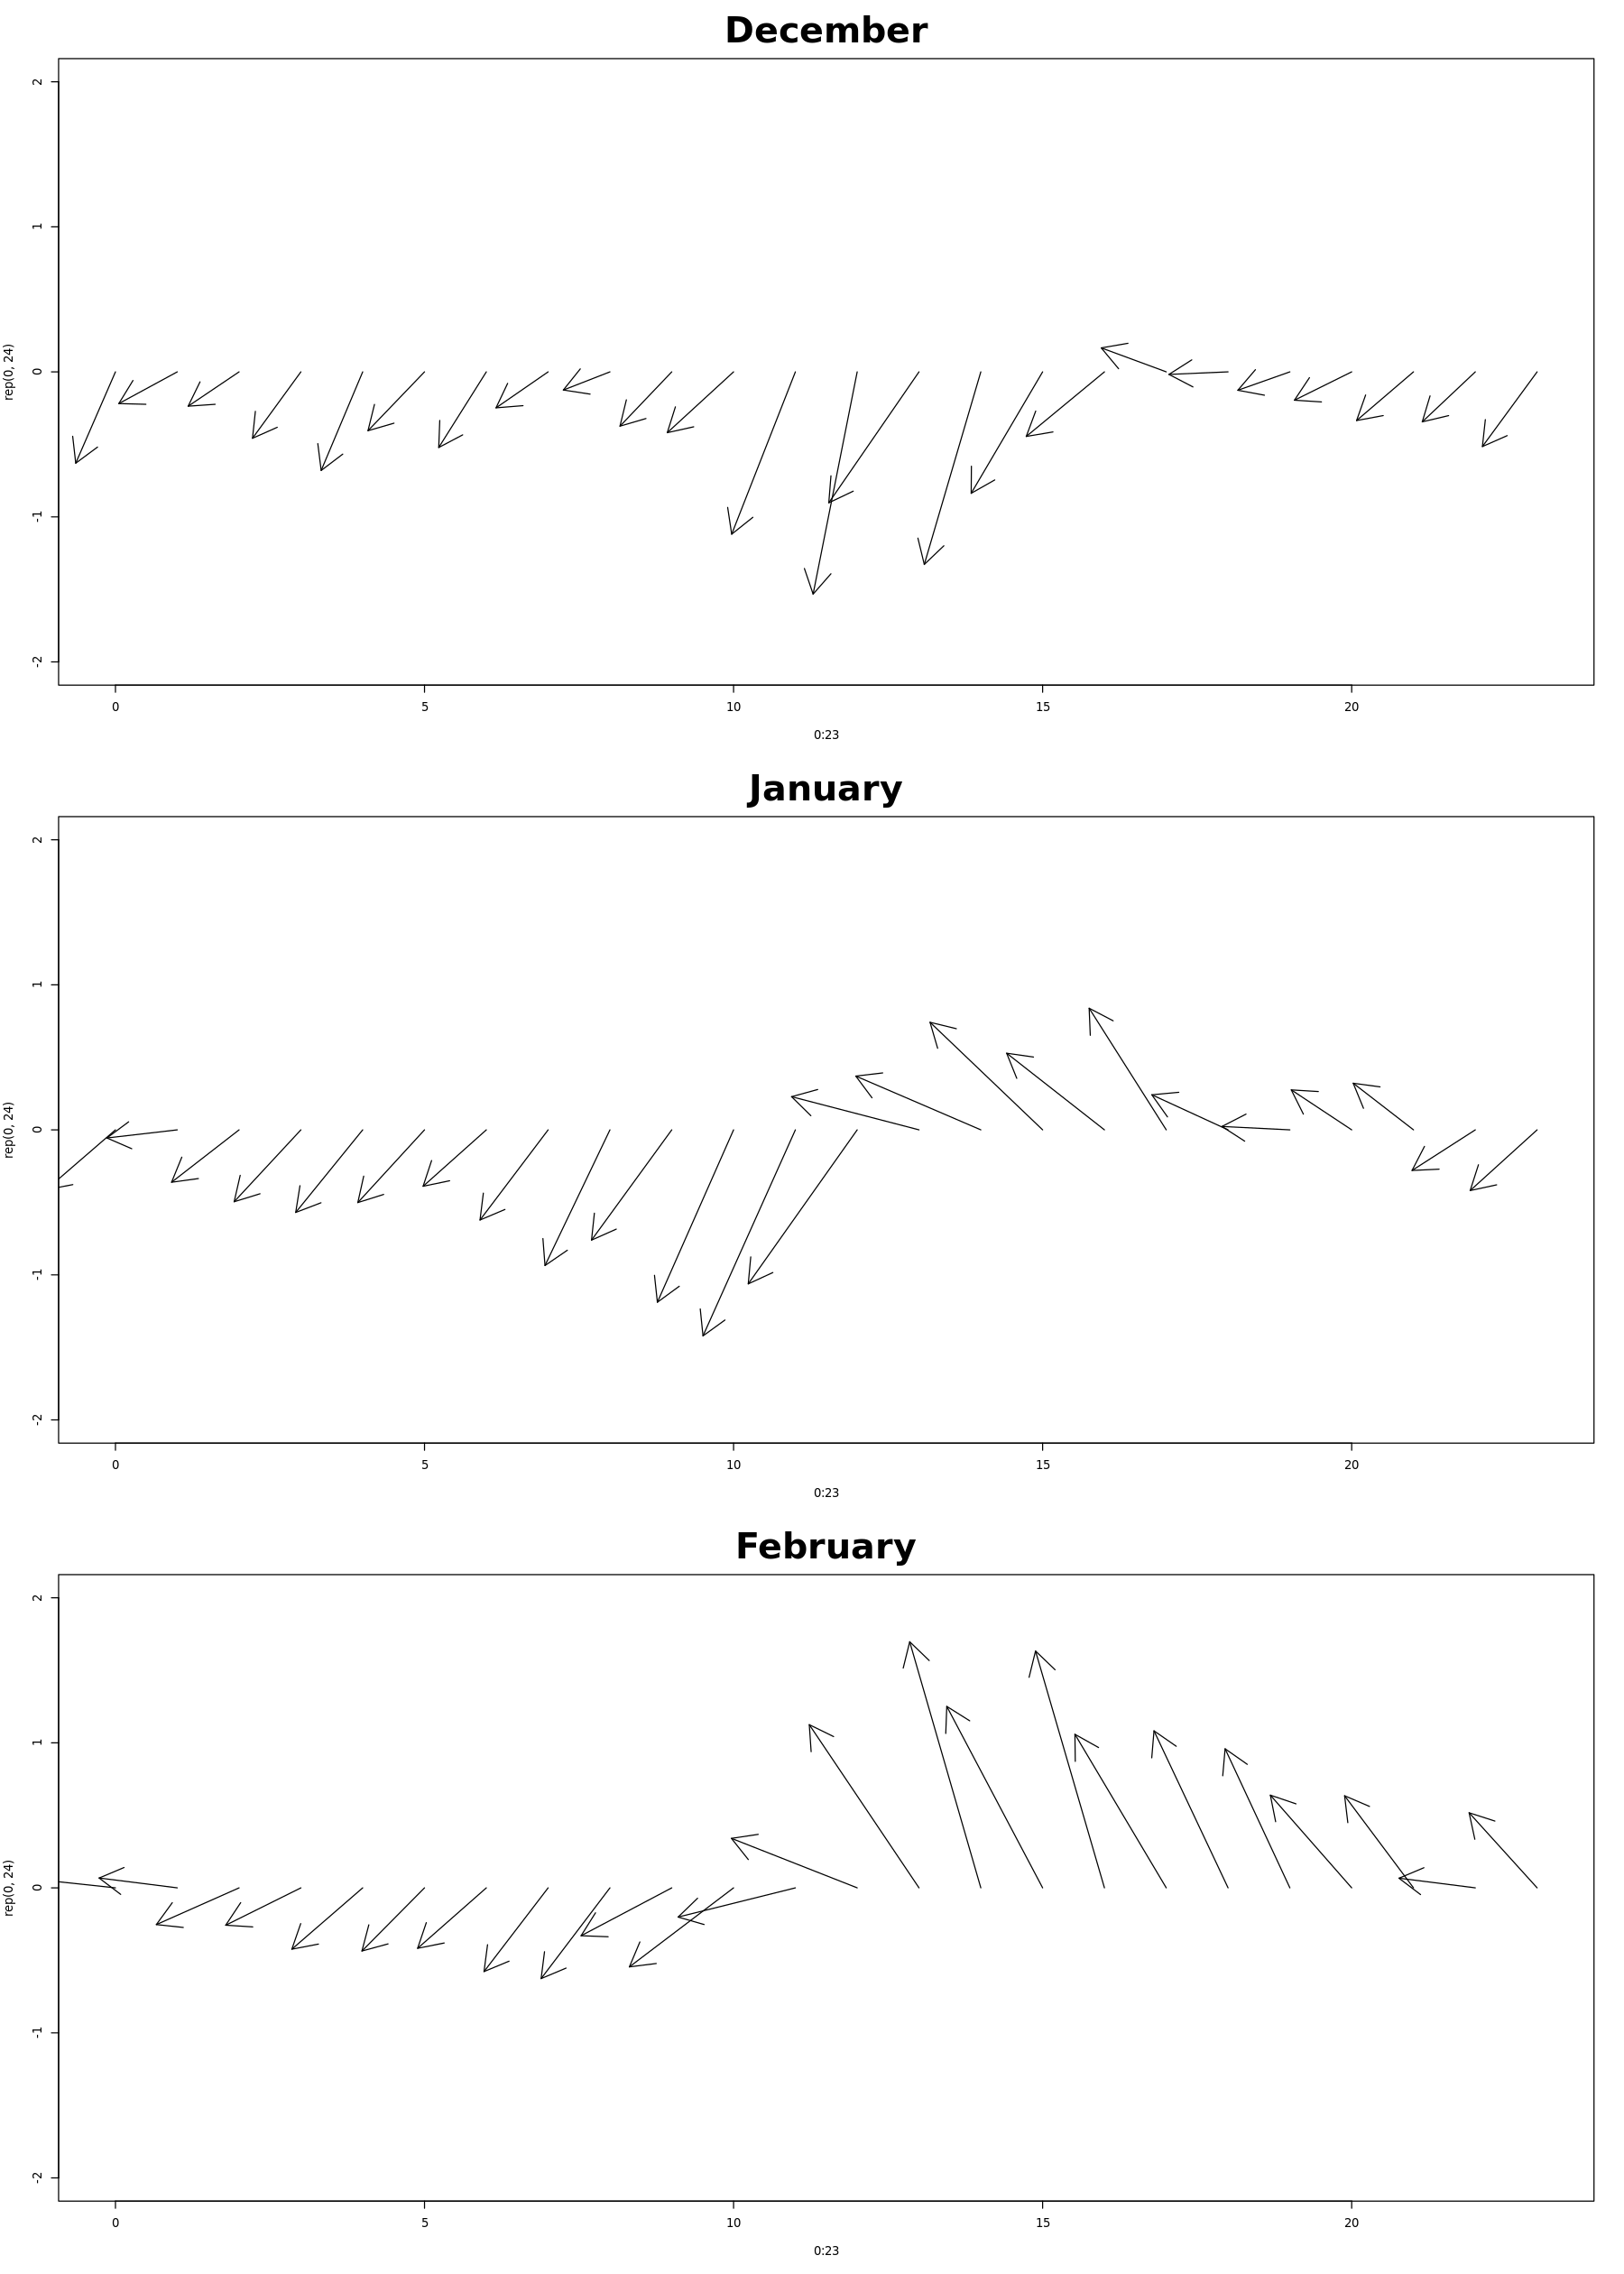

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 21)
par(mfrow = c(3,1))

plot(0:23, rep(0,24), type = 'n', ylim = c(-2,2), main = 'December', cex.main = 3)
arrows(0:23, rep(0,24), 0:23 + dec$spdMean*cos(dec$dirMean), dec$spdMean*sin(dec$dirMean))

plot(0:23, rep(0,24), type = 'n', ylim = c(-2,2), main = 'January', cex.main = 3)
arrows(0:23, rep(0,24), 0:23 + jan$spdMean*cos(jan$dirMean), jan$spdMean*sin(jan$dirMean))

plot(0:23, rep(0,24), type = 'n', ylim = c(-2,2), main = 'February', cex.main = 3)
arrows(0:23, rep(0,24), 0:23 + feb$spdMean*cos(feb$dirMean), feb$spdMean*sin(feb$dirMean))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a65805a3-5683-44f7-87a1-3d0b16d3432c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>